In [667]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [681]:
Med_df = pd.read_csv(r'C:\Users\jacob.colp.UNITY\Downloads\Medical Data Raw\medical_raw_data.csv').set_index('Unnamed: 0')

Med_df = Med_df.reset_index(drop = True)

In [682]:
Med_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7412.000000,7586.000000,7536.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.098219,53.295676,40484.438268,19.412675,5.012200,...,5891.538261,12934.528586,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.155427,20.659182,28664.861050,6.723277,1.045734,...,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,1.000000,...,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,35.000000,19450.792500,16.513171,4.000000,...,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33942.280000,18.080560,5.000000,...,5852.250564,11573.979365,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54075.235000,19.789740,6.000000,...,7614.989701,15626.491033,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,...,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [684]:
for x in Med_df.columns:
    if  Med_df[x].dtype == object:
        Med_df[x].replace({'Yes':1,'yes':1,'No':0,'no':0}, inplace = True)

Med_df.Complication_risk.replace({'High':3, 'Medium':2, 'Low':1}, inplace = True)

Med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Educa

In [685]:
Med_df.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

In [686]:
#Find unique columns
for x in Med_df:
    print(x+': '+str(Med_df[x].is_unique))

CaseOrder: True
Customer_id: True
Interaction: True
UID: True
City: False
State: False
County: False
Zip: False
Lat: False
Lng: False
Population: False
Area: False
Timezone: False
Job: False
Children: False
Age: False
Education: False
Employment: False
Income: False
Marital: False
Gender: False
ReAdmis: False
VitD_levels: True
Doc_visits: False
Full_meals_eaten: False
VitD_supp: False
Soft_drink: False
Initial_admin: False
HighBlood: False
Stroke: False
Complication_risk: False
Overweight: False
Arthritis: False
Diabetes: False
Hyperlipidemia: False
BackPain: False
Anxiety: False
Allergic_rhinitis: False
Reflux_esophagitis: False
Asthma: False
Services: False
Initial_days: False
TotalCharge: True
Additional_charges: False
Item1: False
Item2: False
Item3: False
Item4: False
Item5: False
Item6: False
Item7: False
Item8: False


In [687]:
#I am dropping Job, Income, and Marital Status because those all may not relate to the patient. There is no documentation on whether or not the patient is the primary insurance carrier and these variables are all relative to the primary insurace carrier. It is does not benefit our target outcome to have data that may not inform about that individual.

Med_df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Job', 'Income', 'Marital'], axis = 1, inplace = True)

Med_df.columns

Index(['City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Children', 'Age', 'Education', 'Employment', 'Gender',
       'ReAdmis', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [688]:
categorical_variables = ['City', 'State', 'County', 'Zip', 'Area', 'Timezone', 'Education', 'Employment', 'Gender', 'Initial_admin', 'Services']

for x in categorical_variables:
    Med_df[x] = Med_df[x].astype('category')

Med_df.dtypes

City                  category
State                 category
County                category
Zip                   category
Lat                    float64
Lng                    float64
Population               int64
Area                  category
Timezone              category
Children               float64
Age                    float64
Education             category
Employment            category
Gender                category
ReAdmis                  int64
VitD_levels            float64
Doc_visits               int64
Full_meals_eaten         int64
VitD_supp                int64
Soft_drink             float64
Initial_admin         category
HighBlood                int64
Stroke                   int64
Complication_risk        int64
Overweight             float64
Arthritis                int64
Diabetes                 int64
Hyperlipidemia           int64
BackPain                 int64
Anxiety                float64
Allergic_rhinitis        int64
Reflux_esophagitis       int64
Asthma  

In [689]:
for x in Med_df:
    print(Med_df[x].value_counts())

Houston           36
San Antonio       26
Springfield       22
Miami             21
New York          21
                  ..
Hollenberg         1
Hollandale         1
Holland Patent     1
Holcombe           1
Zumbro Falls       1
Name: City, Length: 6072, dtype: int64
TX    553
CA    550
PA    547
NY    514
IL    442
OH    383
MO    328
FL    304
VA    287
IA    276
MI    273
MN    267
NC    254
GA    247
KS    220
WI    214
KY    210
WV    207
OK    207
IN    195
TN    194
AL    194
WA    191
AR    190
NE    185
CO    179
NJ    176
LA    173
MA    149
MS    134
MD    131
SC    128
SD    123
OR    122
ME    122
MT    112
NM    110
ID    109
ND    108
AZ    108
CT     80
NH     79
UT     72
AK     70
VT     60
NV     51
WY     51
PR     43
HI     34
DE     17
RI     14
DC     13
Name: State, dtype: int64
Jefferson      118
Washington     100
Franklin        93
Los Angeles     88
Montgomery      80
              ... 
Churchill        1
Republic         1
Cimarron         1
St. Martin   

In [690]:
#Encode categorical variables for multiple imputation in IterativeImputer. Original variables were stored as to be restored later in cleaning process.

label_encode = preprocessing.LabelEncoder()

for x in Med_df[categorical_variables]:
    encode_column = str(x)+'_Encoded'
    Med_df[encode_column] = label_encode.fit_transform(Med_df[x])

Med_df_cat = Med_df[categorical_variables]

Med_df.drop(categorical_variables, axis = 1, inplace = True)

In [691]:
#Use IterativeImputer from Sklearn to impute missing values in the dataset

It_Imp = IterativeImputer(skip_complete = True, min_value = 0)

Med_df_fill = np.round(It_Imp.fit_transform(Med_df))

Med_df_fill = pd.DataFrame(Med_df_fill)

Med_df_fill.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
dtype: int64

In [692]:
#Restore categorical values from holding df.

for x in Med_df_cat:
    Med_df[x] = Med_df_cat[x]
    drop_encode_column = str(x)+'_Encoded'
    Med_df.drop(drop_encode_column, axis = 1, inplace = True)

Med_df.columns

Index(['Lat', 'Lng', 'Population', 'Children', 'Age', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Soft_drink',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8', 'City', 'State', 'County', 'Zip',
       'Area', 'Timezone', 'Education', 'Employment', 'Gender',
       'Initial_admin', 'Services'],
      dtype='object')

In [693]:
#Remap imputed values into original columns. Definitely a more effiecient way of this. Could probably get imputed column indexes from the IterativeImputer attributes

Med_df['Children'] = Med_df_fill[9]
Med_df['Age'] = Med_df_fill[10]
Med_df['Soft_drink'] = Med_df_fill[19]
Med_df['Overweight'] = Med_df_fill[24]
Med_df['Anxiety'] = Med_df_fill[29]
Med_df['Initial_days'] = Med_df_fill[34]

for x in Med_df:
    print(Med_df[x].value_counts())

36.06702    4
33.34798    4
35.25512    4
39.38610    4
37.86890    4
           ..
41.00911    1
39.20560    1
46.36035    1
34.96563    1
40.49998    1
Name: Lat, Length: 8588, dtype: int64
-121.28753    4
-82.35159     4
-85.99134     4
-105.68001    4
-89.03658     4
             ..
-74.87894     1
-99.17911     1
-91.81854     1
-106.83727    1
-80.19959     1
Name: Lng, Length: 8601, dtype: int64
0        109
195       14
115       11
178       11
285       11
        ... 
8092       1
11147      1
27175      1
7371       1
41524      1
Name: Population, Length: 5951, dtype: int64
0.0    6702
1.0    2684
2.0     544
3.0      64
4.0       5
5.0       1
Name: Children, dtype: int64
0.0    8056
1.0    1944
Name: Age, dtype: int64
0    6331
1    3669
Name: ReAdmis, dtype: int64
17.802330    1
18.423248    1
15.954743    1
19.566698    1
19.221626    1
            ..
18.107325    1
17.331743    1
49.013013    1
18.292722    1
20.421883    1
Name: VitD_levels, Length: 10000, dtype: int

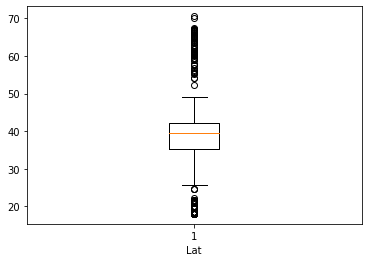

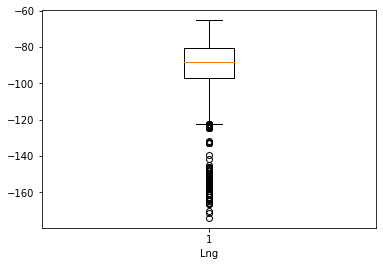

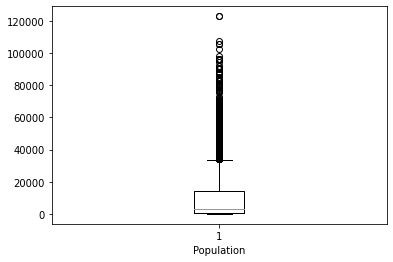

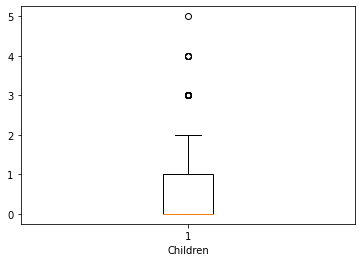

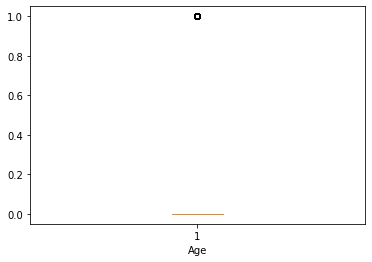

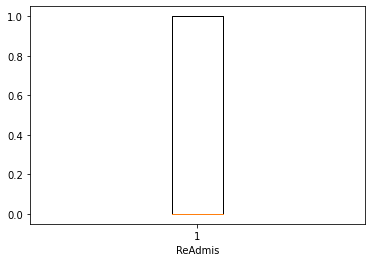

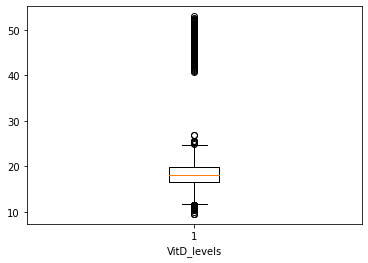

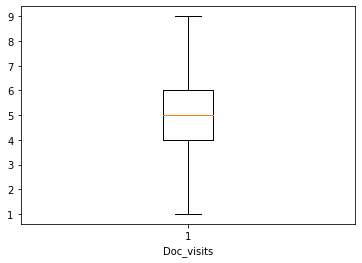

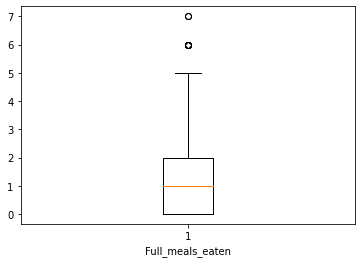

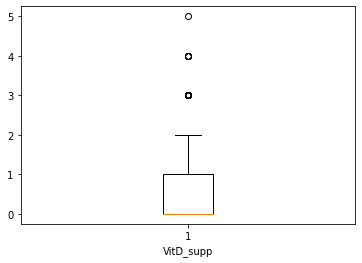

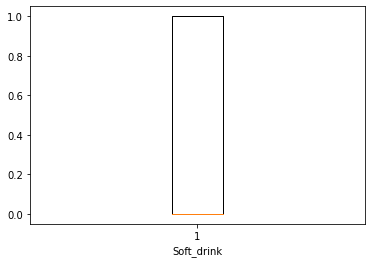

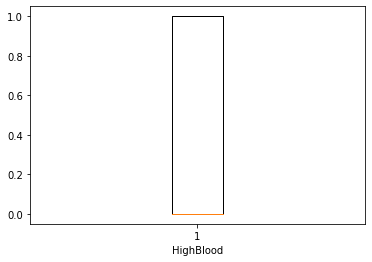

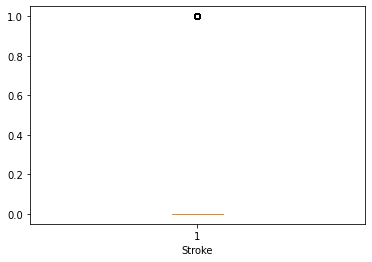

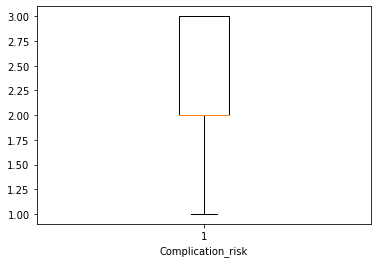

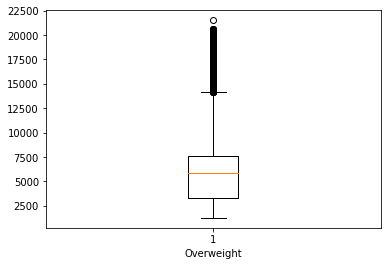

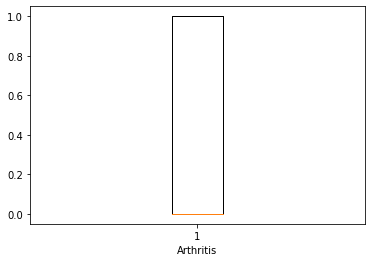

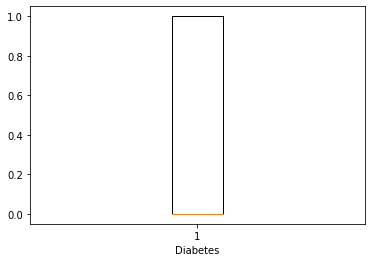

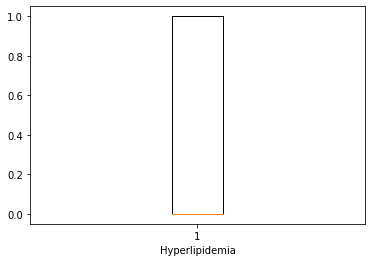

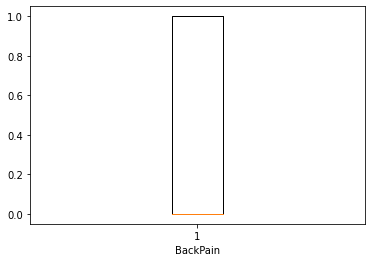

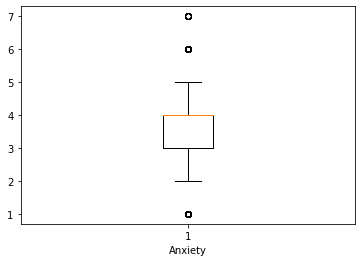

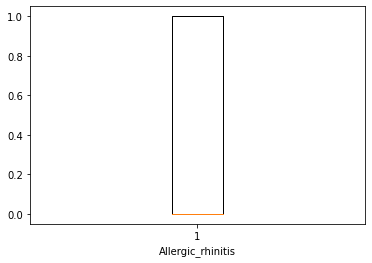

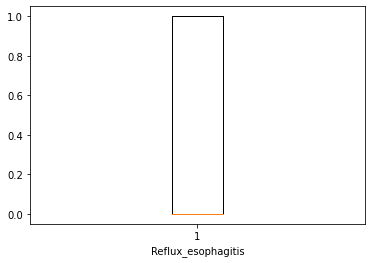

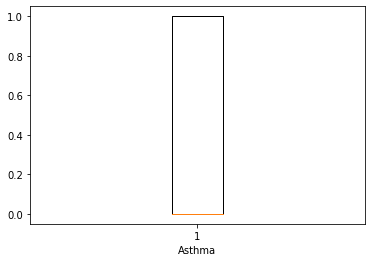

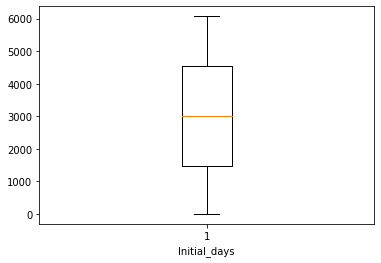

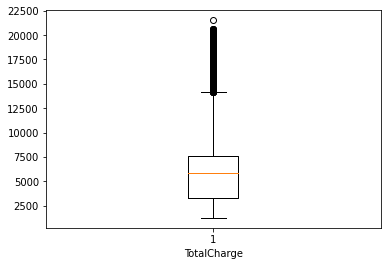

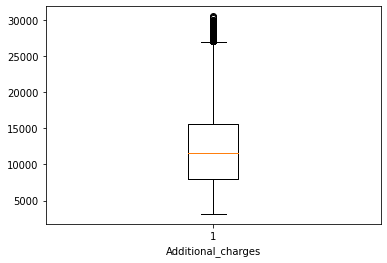

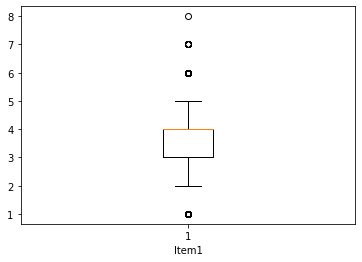

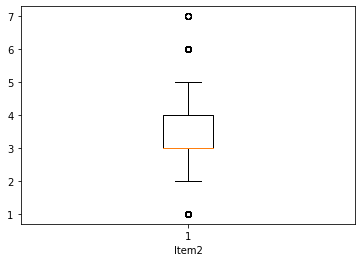

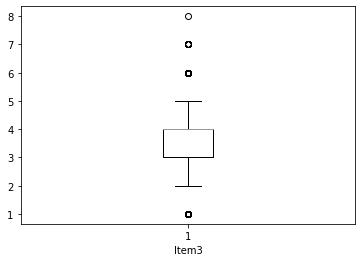

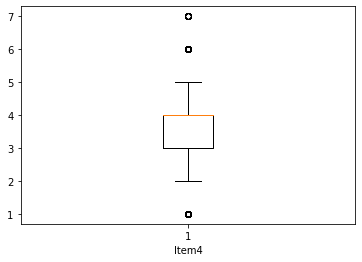

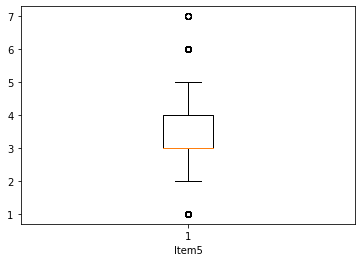

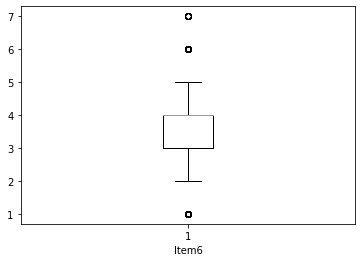

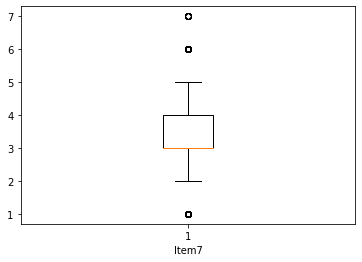

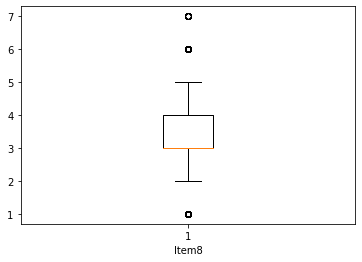

In [703]:
for x in Med_df.select_dtypes(exclude = [object, 'category']):
        pyplot.boxplot(Med_df[x])
        pyplot.xlabel(x)
        pyplot.show()